# Treinamento com interface de alto nível

## Importação das bibliotecas

In [ ]:
# http://pytorch.org/
from os.path import exists

import torch

In [ ]:
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR
from torch.utils.data import Dataset, random_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder


# Getting the Dataset from GitHub

In [ ]:
!git clone https://github.com/vcasadei/Old-car-price-prediction.git

fatal: destination path 'Old-car-price-prediction' already exists and is not an empty directory.


In [ ]:
old_car_prediction_csv = "/content/Old-car-price-prediction/car_price.csv"

# Getting the Dataset from Kaggle

[kaggle.com/datasets/milanvaddoriya/old-car-price-prediction](https://kaggle.com/datasets/milanvaddoriya/old-car-price-prediction)

In [ ]:
#!/bin/bash
!curl -L -o /content/archive.zip https://www.kaggle.com/api/v1/datasets/download/milanvaddoriya/old-car-price-prediction

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  105k  100  105k    0     0   101k      0  0:00:01  0:00:01 --:--:--  101k


In [ ]:
!unzip -o /content/archive.zip -d /content/Old-car-price-prediction-kaggle

Archive:  /content/archive.zip
  inflating: /content/Old-car-price-prediction-kaggle/car_price.csv  


In [ ]:
old_car_prediction_csv = "/content/Old-car-price-prediction-kaggle/car_price.csv"

# Tratando os dados

In [ ]:
df = pd.read_csv(old_car_prediction_csv)
df.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats
0,0,Jeep Compass 2.0 Longitude Option BSIV,10.03 Lakh,"86,226 kms",Diesel,Manual,1st Owner,2017,1956 cc,5 Seats
1,1,Renault Duster RXZ Turbo CVT,12.83 Lakh,"13,248 kms",Petrol,Automatic,1st Owner,2021,1330 cc,5 Seats
2,2,Toyota Camry 2.5 G,16.40 Lakh,"60,343 kms",Petrol,Automatic,1st Owner,2016,2494 cc,5 Seats
3,3,Honda Jazz VX CVT,7.77 Lakh,"26,696 kms",Petrol,Automatic,1st Owner,2018,1199 cc,5 Seats
4,4,Volkswagen Polo 1.2 MPI Highline,5.15 Lakh,"69,414 kms",Petrol,Manual,1st Owner,2016,1199 cc,5 Seats


In [ ]:
df.shape

(5512, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5512 entries, 0 to 5511
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           5512 non-null   int64 
 1   car_name             5512 non-null   object
 2   car_prices_in_rupee  5512 non-null   object
 3   kms_driven           5512 non-null   object
 4   fuel_type            5512 non-null   object
 5   transmission         5512 non-null   object
 6   ownership            5512 non-null   object
 7   manufacture          5512 non-null   int64 
 8   engine               5512 non-null   object
 9   Seats                5512 non-null   object
dtypes: int64(2), object(8)
memory usage: 430.8+ KB


In [ ]:
# check Missing value
df.isnull().sum()

,0
Unnamed: 0,0
car_name,0
car_prices_in_rupee,0
kms_driven,0
fuel_type,0
transmission,0
ownership,0
manufacture,0
engine,0
Seats,0


In [ ]:
# Check Duplication
df.duplicated().sum()

0

In [ ]:
#Check datatype
df.dtypes

,0
Unnamed: 0,int64
car_name,object
car_prices_in_rupee,object
kms_driven,object
fuel_type,object
transmission,object
ownership,object
manufacture,int64
engine,object
Seats,object


In [ ]:
# Check the number of unique values of each column
df.nunique()

,0
Unnamed: 0,5512
car_name,1896
car_prices_in_rupee,1300
kms_driven,2610
fuel_type,5
transmission,2
ownership,6
manufacture,26
engine,139
Seats,6


In [ ]:
#Check statistics of data set
df.describe()

,Unnamed: 0,manufacture
count,5512.000000,5512.000000
mean,2755.500000,2015.455552
std,1591.321673,3.927974
min,0.000000,1995.000000
25%,1377.750000,2013.000000
50%,2755.500000,2016.000000
75%,4133.250000,2018.000000
max,5511.000000,2022.000000


In [ ]:
def company_name(x):
    return x[:x.index(" ")]
def car_name(x):
    return x[x.index(" ") + 1:]
df["company_name"] = df["car_name"].apply(company_name)
df["car_name"] = df["car_name"].apply(car_name)

In [ ]:
def change_rupes(x):
    p = x.split(" ")
    try:
        if p[1] == "Lakh":
            return str (round(float(p[0])*100000,1))
        elif p[1] == "Crore":
             return str (round(float(p[0])*10000000,1))
    except:
        return x

In [ ]:
df["car_prices_in_rupee"] = df["car_prices_in_rupee"].apply(change_rupes)
df["car_prices_in_rupee"] = df["car_prices_in_rupee"].astype("float64")

In [ ]:
categorical_columns = ['fuel_type','transmission','company_name','car_name']

for col in categorical_columns:
    print(f"Category in {col} is : {df[col].unique()}")

Category in fuel_type is : ['Diesel' 'Petrol' 'Cng' 'Electric' 'Lpg']
Category in transmission is : ['Manual' 'Automatic']
Category in company_name is : ['Jeep' 'Renault' 'Toyota' 'Honda' 'Volkswagen' 'Maruti' 'Mahindra'
 'Hyundai' 'Nissan' 'Kia' 'MG' 'Tata' 'BMW' 'Mercedes-Benz' 'Datsun'
 'Volvo' 'Audi' 'Porsche' 'Ford' 'Chevrolet' 'Skoda' 'Lexus' 'Land' 'Mini'
 'Jaguar' 'Mitsubishi' 'Force' 'Premier' 'Fiat' 'Maserati' 'Bentley'
 'Isuzu']
Category in car_name is : ['Compass 2.0 Longitude Option BSIV' 'Duster RXZ Turbo CVT' 'Camry 2.5 G'
 ... 'XC 90 D5 Momentum BSIV' 'E-Class E250 Edition E' 'M Series M4 Coupe']


In [ ]:
df["kms_driven"] = df["kms_driven"].str.replace(" kms","")
df["kms_driven"] = df["kms_driven"].str.replace(",","")
df["kms_driven"] = df["kms_driven"].astype("int64")
df["ownership"] = df["ownership"].str.replace("th Owner","")
df["ownership"] = df["ownership"].str.replace("st Owner","")
df["ownership"] = df["ownership"].str.replace("nd Owner","")
df["ownership"] = df["ownership"].str.replace("rd Owner","")
df["ownership"] = df["ownership"].astype("int64")
df["engine"] = df["engine"].str.replace(" cc","")
df["engine"] = df["engine"].astype("int64")
df["Seats"] = df["Seats"].str.replace(" Seats","")
df["Seats"] = df["Seats"].astype("int64")

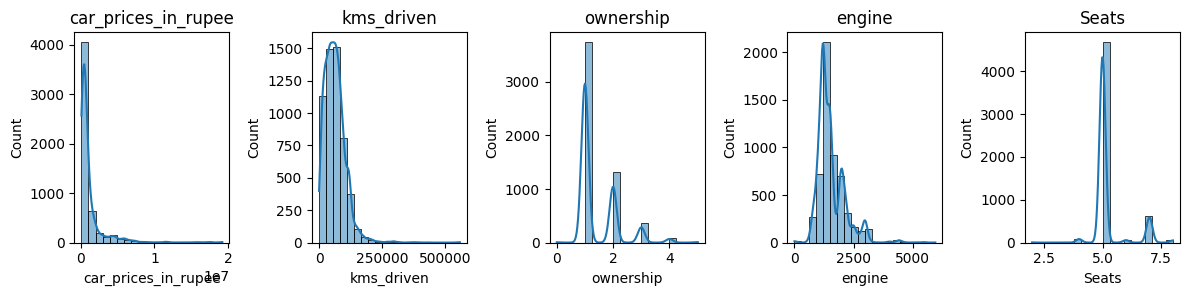

In [ ]:
# Distribution of Numerical Features
numerical_features = ['car_prices_in_rupee', 'kms_driven', 'ownership', 'engine', 'Seats']

plt.figure(figsize=(12, 8))
for feature in numerical_features:
    plt.subplot(3, 5, numerical_features.index(feature) + 1)
    sns.histplot(data=df[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

In [ ]:
df.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,company_name
0,0,Compass 2.0 Longitude Option BSIV,1003000.0,86226,Diesel,Manual,1,2017,1956,5,Jeep
1,1,Duster RXZ Turbo CVT,1283000.0,13248,Petrol,Automatic,1,2021,1330,5,Renault
2,2,Camry 2.5 G,1640000.0,60343,Petrol,Automatic,1,2016,2494,5,Toyota
3,3,Jazz VX CVT,777000.0,26696,Petrol,Automatic,1,2018,1199,5,Honda
4,4,Polo 1.2 MPI Highline,515000.0,69414,Petrol,Manual,1,2016,1199,5,Volkswagen


In [ ]:
car_name_en = LabelEncoder()
df["car_name"] = car_name_en.fit_transform(df["car_name"])

fuel_type_en = LabelEncoder()
df["fuel_type"] = fuel_type_en.fit_transform(df["fuel_type"])

transmission_en = LabelEncoder()
df["transmission"] = transmission_en.fit_transform(df["transmission"])

company_name_en = LabelEncoder()
df["company_name"] = company_name_en.fit_transform(df["company_name"])

In [ ]:
df.head()

,Unnamed: 0,car_name,car_prices_in_rupee,kms_driven,fuel_type,transmission,ownership,manufacture,engine,Seats,company_name
0,0,426,1003000.0,86226,1,1,1,2017,1956,5,12
1,1,509,1283000.0,13248,4,0,1,2021,1330,5,26
2,2,290,1640000.0,60343,4,0,1,2016,2494,5,29
3,3,912,777000.0,26696,4,0,1,2018,1199,5,8
4,4,1095,515000.0,69414,4,1,1,2016,1199,5,30


In [ ]:
df.shape

(5512, 11)

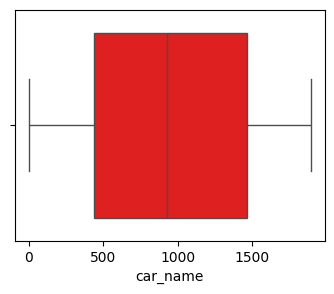

In [ ]:
plt.figure(figsize=(4,3))
sns.boxplot(x="car_name",data=df,color="r")
plt.show()

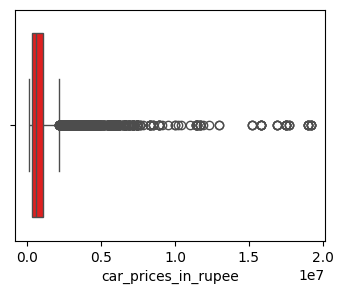

In [ ]:
plt.figure(figsize=(4,3))
sns.boxplot(x="car_prices_in_rupee",data=df,color="r")
plt.show()

<Axes: >

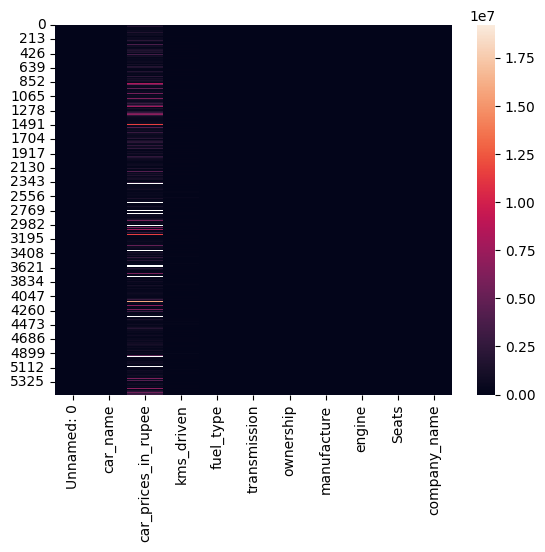

In [ ]:
sns.heatmap(df)

In [ ]:
ss = StandardScaler()
new_df = pd.DataFrame(ss.fit_transform(df),columns=df.columns)

<Axes: >

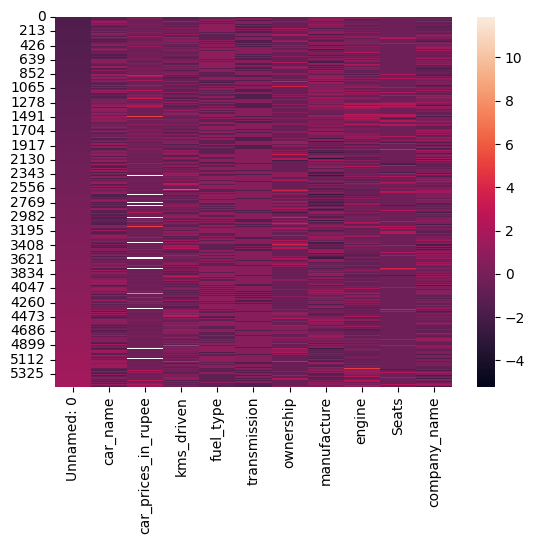

In [ ]:
sns.heatmap(new_df)

In [ ]:
new_df.shape

(5512, 11)

In [ ]:
x = new_df[['car_name','kms_driven','fuel_type','transmission','ownership','manufacture','engine','Seats']]
y = new_df['car_prices_in_rupee']
y = y.values.reshape(-1, 1)
x = x.to_numpy()

# Criação Dataset

In [ ]:
class OldCarsDataset(Dataset):
    def __init__(self, x, y):
      super(OldCarsDataset, self).__init__()
      if (len(x) != len(y)):
        raise ValueError('Number of X and Y samples do not match!')
      self.x = torch.FloatTensor(x)
      self.y = torch.FloatTensor(y)
      self.x = torch.nan_to_num(self.x)
      self.y = torch.nan_to_num(self.y)

    def __getitem__(self, index):
      return self.x[index], self.y[index]

    def __len__(self):
      return len(self.x)

In [ ]:
dataset = OldCarsDataset(x, y)

In [ ]:
train_data, val_data = random_split(dataset, [0.7, 0.3])

In [ ]:
print("Number of training samples:", len(train_data))
print("Number of validation samples:", len(val_data))

Number of training samples: 3859
Number of validation samples: 1653


## DataLoader

In [ ]:
use_cuda = torch.cuda.is_available()

torch.manual_seed(1111)

device = torch.device("cuda" if use_cuda else "cpu")

train_kwargs = {'batch_size': 300}
test_kwargs = {'batch_size': 1000}
if use_cuda:
    cuda_kwargs = {'num_workers': 1,
                    'pin_memory': True,
                    'shuffle': True}
    train_kwargs.update(cuda_kwargs)
    test_kwargs.update(cuda_kwargs)

train_loader = torch.utils.data.DataLoader(train_data,**train_kwargs)
test_loader = torch.utils.data.DataLoader(val_data, **test_kwargs)

## Criação da rede

In [ ]:
x.shape

(5512, 8)

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.layer1 = nn.Linear(8, 32)
        self.layer2 = nn.Linear(32, 64)
        self.layer3 = nn.Linear(64, 32)
        self.layer4 = nn.Linear(32, 1)

    def forward(self, x):
        x = self.layer1(x)
        x = F.relu(x)
        x = self.layer2(x)
        x = F.relu(x)
        x = self.layer3(x)
        x = F.relu(x)
        output = self.layer4(x)
        return output

model = Net()

In [ ]:
model

Net(
  (layer1): Linear(in_features=8, out_features=32, bias=True)
  (layer2): Linear(in_features=32, out_features=64, bias=True)
  (layer3): Linear(in_features=64, out_features=32, bias=True)
  (layer4): Linear(in_features=32, out_features=1, bias=True)
)

# Predict

In [ ]:
model(train_data[10][0])

tensor([0.0388], grad_fn=<ViewBackward0>)

## Treinamento

### Criando o objeto de treinamento

In [ ]:
def train(log_interval, dry_run, model, device, train_loader, optimizer, epoch, criterion):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        output = model(data)
        loss = criterion(output, target)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if dry_run:
          break
    print('Train Epoch: {} \tLoss: {:.6f}'.format(
        epoch, loss.data))


In [ ]:
def test(model, device, test_loader, criterion):
    model.eval()
    total_loss = 0
    total_samples = 0

    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            loss = criterion(output, target)
            total_loss += loss.item() * target.size(0)
            total_samples += target.size(0)

            # Calculate Mean Squared Error
        mse = total_loss / total_samples
        print(f'Mean Squared Error on validation set: {mse:.4f}')
    return mse

## Avaliação

In [ ]:
use_cuda = torch.cuda.is_available()
use_cuda

True

In [ ]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.1)
criterion = nn.MSELoss()
best_loss = test(model, device, test_loader, criterion)

epochs = 300

for epoch in range(1, epochs + 1):
    train(10, False, model, device, train_loader, optimizer, epoch, criterion)
    loss = test(model, device, test_loader, criterion)
    if (loss < best_loss):
      best_loss = loss
      torch.save(model.state_dict(), "old_car_price_nn.pt")

Mean Squared Error on validation set: 0.7880
Train Epoch: 1 	Loss: 1.142441
Mean Squared Error on validation set: 0.7312
Train Epoch: 2 	Loss: 0.278291
Mean Squared Error on validation set: 0.5713
Train Epoch: 3 	Loss: 0.312623
Mean Squared Error on validation set: 0.4847
Train Epoch: 4 	Loss: 0.504362
Mean Squared Error on validation set: 0.4604
Train Epoch: 5 	Loss: 1.158705
Mean Squared Error on validation set: 0.4571
Train Epoch: 6 	Loss: 0.615551
Mean Squared Error on validation set: 0.4500
Train Epoch: 7 	Loss: 0.691966
Mean Squared Error on validation set: 0.4467
Train Epoch: 8 	Loss: 0.646229
Mean Squared Error on validation set: 0.4483
Train Epoch: 9 	Loss: 0.576352
Mean Squared Error on validation set: 0.4558
Train Epoch: 10 	Loss: 0.997360
Mean Squared Error on validation set: 0.4677
Train Epoch: 11 	Loss: 0.492690
Mean Squared Error on validation set: 0.4451
Train Epoch: 12 	Loss: 0.733619
Mean Squared Error on validation set: 0.4543
Train Epoch: 13 	Loss: 0.852600
Mean Squ